# Regresi

## Linear Regession
Kita dapat memberikan beberapa parameter optional untuk linear regression. 
* Fit_intercept => is a Boolean (True by default), that decides whether to normalize the intercept b0 (True) or consider it equa; to zero (false)
* normalize
* copy_X
* n_jobs

#### 1. Import library

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets


import statsmodels.api as sm
%matplotlib inline

#### 2. Provide data

In [3]:
x = np.array([5, 15, 25, 32, 27, 38, 54]).reshape((-1, 1))
y = np.array([5, 23, 56, 38, 21, 14, 52])

In [4]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [32]
 [27]
 [38]
 [54]]
[ 5 23 56 38 21 14 52]


#### 3. Create a model and fit it

In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression()

In [7]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [9]:
model = LinearRegression().fit(x, y)

#### 4. Get Result

In [10]:
r_sq = model.score(x, y)
print("Coeficient of determination:", r_sq)

Coeficient of determination: 0.3232663001789824


In [11]:
print('Intercept:', model.intercept_)
print('slope:', model.coef_)

Intercept: 10.425142857142859
slope: [0.694]


In [12]:
new_model = LinearRegression().fit(x, y.reshape((-1,1)))
print('Intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

Intercept: [10.42514286]
slope: [[0.694]]


#### 5. Predict Response

In [13]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[13.89514286 20.83514286 27.77514286 32.63314286 29.16314286 36.79714286
 47.90114286]


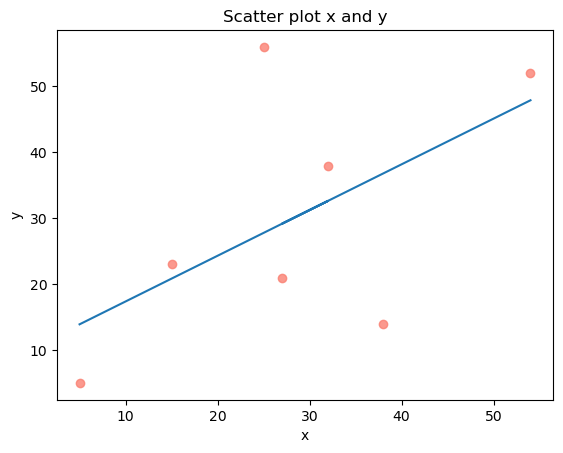

In [20]:
plt.scatter(x, y, alpha=0.8, color='salmon')
plt.plot(x, y_pred)

plt.title("Scatter plot x and y")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
y_pred = model.intercept_ + model.coef_ * x
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[[13.89514286]
 [20.83514286]
 [27.77514286]
 [32.63314286]
 [29.16314286]
 [36.79714286]
 [47.90114286]]


In [27]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[10.42514286 11.11914286 11.81314286 12.50714286 13.20114286]


## Multiple Linear Regression with scikit-learn
dalam multiple, x adalah two-dimentional array dengan setidaknya dua kolom. Sedangkan y biasanya adalah one-dimentional array.

In [59]:
u = [[0, 5], [8, 4], [3, 9], [6, 2], [0, 5], [7, 3], [4, 6], [9, 1]]

In [60]:
v = [ 5, 9, 6, 2, 7, 4, 6, 5]

In [61]:
u, v = np.array(u), np.array(v)

In [62]:
print(u)
print(v)

[[0 5]
 [8 4]
 [3 9]
 [6 2]
 [0 5]
 [7 3]
 [4 6]
 [9 1]]
[5 9 6 2 7 4 6 5]


In [63]:
model = LinearRegression().fit(u, v)

In [65]:
# get result
r_sq = model.score(u, v)
r_sq

0.19697590058542547

In [66]:
model.intercept_

2.8474302338110107

In [67]:
model.coef_

array([0.14535072, 0.45264519])

intercept kita 2,8, dan ini adalah nilai respons yang diprediksi ketika x1=x2=0. Peningkatang x sebesar 1 menghasilkan kenaikan respons yang diprediksi sebesar 0,1. Dan saat x2 naik sebesar 1, respon naik sebesar 0.45

In [68]:
y_pred = model.predict(x)
print('predict response: ', y_pred, sep='\n')

predict response: 
[5.11065618 5.82081672 7.35728909 4.62482491 6.12811119 7.93869195
 7.04999461 4.60823187]


In [69]:
# Respon yang diprediksi identik dengan nilai ini:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[5.11065618 5.82081672 7.35728909 4.62482491 6.12811119 7.93869195
 7.04999461 4.60823187]


Kita dapat memprediksi jumlah nilai output dengan mengalikan setiap kolom input denfan bobot yang sesuai, menjumlahkan hasilnya dan menambahkan intercept ke jumlahnya.

In [70]:
# Menerapkan model ke data baru
u_new = np.arange(10).reshape((-1, 2))
print(u_new)
v_new = model.predict(u_new)
print(v_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[3.30007542 4.49606723 5.69205905 6.88805086 8.08404267]


### Polinomial Regression With Scikit-learn
Parameter opsional ke polinomial regression
* degree
* interaction_only
* include_bias

In [82]:
# Step 2a: Provide data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([3, 5, 6, 8, 12, 25])

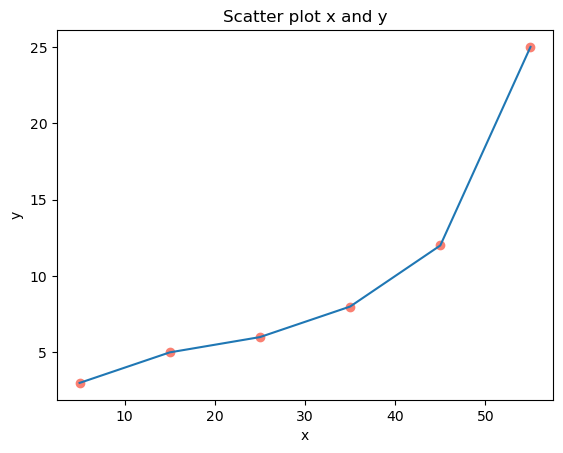

In [77]:
plt.scatter(x, y, color='salmon')
plt.plot(x, y)

plt.title("Scatter plot x and y")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [83]:
# Step 2b: Transform input data
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [86]:
transformer

PolynomialFeatures(include_bias=False)

In [87]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [88]:
PolynomialFeatures(degree=2, include_bias=False, interaction_only=False, order='C' )

PolynomialFeatures(include_bias=False)

In [89]:
x_ = transformer.transform(x)

In [90]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [91]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

Array input modif berisi 2 kolom, satu x asli yang ke-2 hasil kuadratnya.

In [92]:
# Step 3: Create model and fit it
model = LinearRegression().fit(x_, y)

In [93]:
model

LinearRegression()

In [96]:
# Step 4: Get result
r_sq = model.score(x_, y)
r_sq

0.9482926469503651

In [97]:
model.intercept_

5.711607142857151

In [98]:
model.coef_

array([-0.33785714,  0.01196429])

In [99]:
# Contoh kalo pake argumen transformation yang bedaa
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [100]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [101]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [103]:
r_sq = model.score(x_, y)
r_sq

0.9482926469503651

In [104]:
model.intercept_

0.0

In [105]:
model.coef_

array([ 5.71160714, -0.33785714,  0.01196429])

In [107]:
# Step 5: predict response
y_pred = model.predict(x_)
y_pred

array([ 4.32142857,  3.33571429,  4.74285714,  8.54285714, 14.73571429,
       23.32142857])

In [109]:
# 2a. Provide data
print(u)
print(v)

[[0 5]
 [8 4]
 [3 9]
 [6 2]
 [0 5]
 [7 3]
 [4 6]
 [9 1]]
[5 9 6 2 7 4 6 5]


In [110]:
u, v = np.array(u), np.array(v)

In [112]:
# 2b. Transform input data
u_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(u)

In [114]:
# 3. model
model = LinearRegression().fit(u_, v)

In [115]:
# 4. Result
r_sq = model.score(u_, v)
intercept, koefisien = model.intercept_, model.coef_

In [116]:
# 5. Predict
y_pred = model.predict(x_)

In [117]:
print(r_sq)

0.8825915914585211


In [118]:
print(intercept, koefisien)

-0.6480480347409863 [-1.68718113  1.9641608   0.22239184  0.08713313 -0.12556905]


In [119]:
print(y_pred)

[6.03352979 8.72337927 6.15088403 1.70661438 6.03352979 5.0310409
 5.51717109 4.80385076]


### Advanced Linear Regression with statsmodels

In [123]:
# 2. provide data
u, v = np.array(u), np.array(v)
u

array([[0, 5],
       [8, 4],
       [3, 9],
       [6, 2],
       [0, 5],
       [7, 3],
       [4, 6],
       [9, 1]])

In [125]:
# Menambahkan kolom satu ke input
u = sm.add_constant(u)
u

array([[1., 0., 5.],
       [1., 8., 4.],
       [1., 3., 9.],
       [1., 6., 2.],
       [1., 0., 5.],
       [1., 7., 3.],
       [1., 4., 6.],
       [1., 9., 1.]])

In [128]:
# 3. models
model = sm.OLS(v, u)

In [129]:
result = model.fit()

In [130]:
# 4. get result
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                    0.6132
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.578
Time:                        16:29:33   Log-Likelihood:                -15.761
No. Observations:                   8   AIC:                             37.52
Df Residuals:                       5   BIC:                             37.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8474      2.997      0.950      0.3

C:\Users\ACER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [131]:
result.rsquared

0.19697590058542536

In [133]:
result.rsquared_adj

-0.12423373918040448

In [135]:
result.params

array([2.84743023, 0.14535072, 0.45264519])

In [136]:
# 5. Predict response 
result.fittedvalues

array([5.11065618, 5.82081672, 7.35728909, 4.62482491, 5.11065618,
       5.22282082, 6.14470423, 4.60823187])

In [142]:
# prediksi regresor baru dengan argumen
result.predict(u)

array([5.11065618, 5.82081672, 7.35728909, 4.62482491, 5.11065618,
       5.22282082, 6.14470423, 4.60823187])

### Implementing Linear Regression on Real Dataset

##### Using statsmodels

In [147]:
data = datasets.load_boston()

In [149]:
# Lihat deskripsi data
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [151]:
# define data as the pre-set
df = pd.DataFrame(data.data, columns=data.feature_names)

# put target in anotherdataframe
target = pd.DataFrame(data.target, columns=["MEDV"])

In [155]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [156]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [166]:
X = df['RM']
y = target['MEDV']

In [158]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                   3.74e-256
Time:                        16:43:02   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

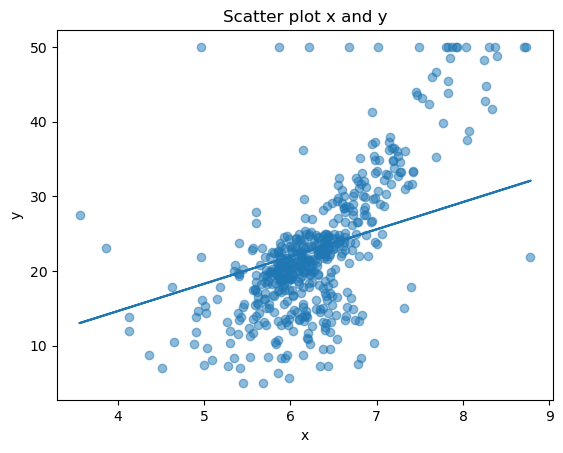

In [160]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using SKlearn

In [167]:
X = df
y = target['MEDV']

In [168]:
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

In [170]:
predictions = lm.predict(X)

In [171]:
lm.score(X, y)

0.7406426641094095

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv',
                usecols=['horsepower', 'price'])

In [174]:
df

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


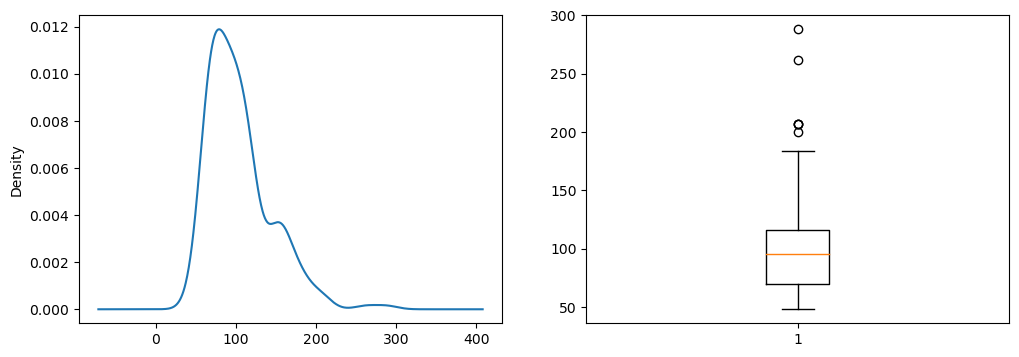

In [175]:
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1, 2, 2)
plt.boxplot(df['horsepower'])
plt.show()

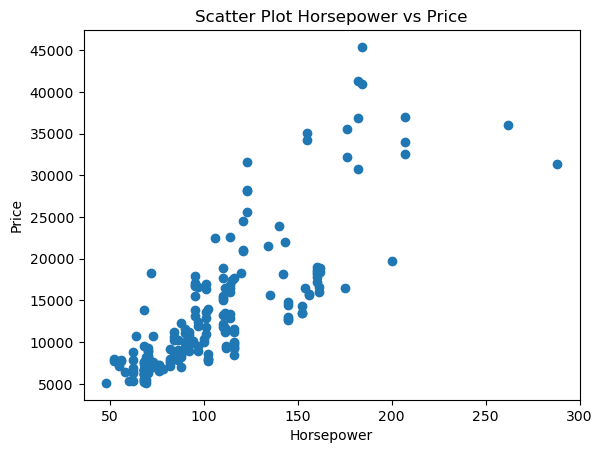

In [176]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [180]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [181]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [183]:
x_train.shape

(164, 1)

In [184]:
x_test.shape

(41, 1)

In [185]:
y_train.shape

(164, 1)

In [187]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [190]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [191]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[159.68498971]]
[-3328.28009728]


In [192]:
lin_reg.score(x_test, y_test)

0.6535107775093081

Text(0.5, 1.0, 'Plot Horsepower vs Price')

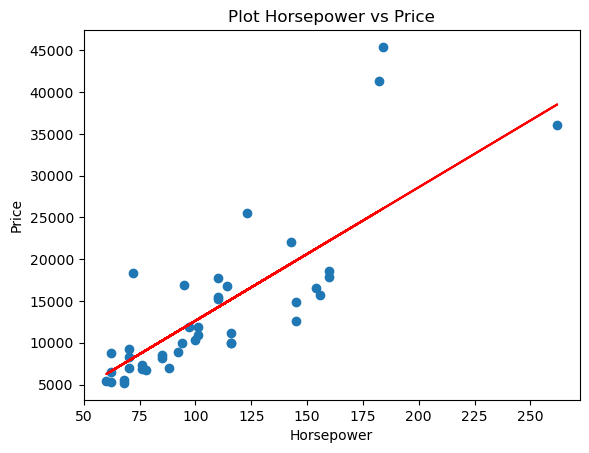

In [195]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [196]:
lin_reg.predict([[100]])

array([[12640.21887323]])

In [197]:
lin_reg.predict([[150]])

array([[20624.46835848]])

In [198]:
lin_reg.predict([[170]])

array([[23818.16815258]])